In [1]:
import ROOT
import math
import uproot 
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from   scipy             import stats

Welcome to JupyROOT 6.22/08


In [57]:
ptr = uproot.open('Root_files/Top_reco_op_no_lep_smear.root')['Step8']

In [58]:
t_pt     = ptr['t_pt'].array()
t_phi    = ptr['t_phi'].array()
t_eta    = ptr['t_eta'].array()
t_rap    = ptr['t_rapidity'].array()

t_px     = ptr['t_px'].array()
t_py     = ptr['t_py'].array()
t_pz     = ptr['t_pz'].array()
t_e      = ptr['t_e'].array()

tbar_pt  = ptr['tbar_pt'].array()
tbar_phi = ptr['tbar_phi'].array()
tbar_eta = ptr['tbar_eta'].array()
tbar_rap = ptr['tbar_rapidity'].array()

tbar_px  = ptr['tbar_px'].array()
tbar_py  = ptr['tbar_py'].array()
tbar_pz  = ptr['tbar_pz'].array()
tbar_e   = ptr['tbar_e'].array()

tt_mass  = ptr['tt_mass'].array()

In [59]:
gen_t_pt     = ptr['gen_t_pt'].array()
gen_t_eta    = ptr['gen_t_eta'].array()
gen_t_phi    = ptr['gen_t_phi'].array()
gen_t_rap    = ptr['gen_t_rapidity'].array()

gen_tbar_pt  = ptr['gen_tbar_pt'].array()
gen_tbar_eta = ptr['gen_tbar_eta'].array()
gen_tbar_phi = ptr['gen_tbar_phi'].array()
gen_tbar_rap = ptr['gen_tbar_rapidity'].array()

gen_tt_mass  = ptr['gen_tt_mass'].array()

In [60]:
l_pt     = ptr['l_pt'].array()
l_phi    = ptr['l_phi'].array()
l_eta    = ptr['l_eta'].array()
l_mass   = ptr['l_mass'].array()

lbar_pt   = ptr['lbar_pt'].array()
lbar_phi  = ptr['lbar_phi'].array()
lbar_eta  = ptr['lbar_eta'].array()
lbar_mass = ptr['lbar_mass'].array()

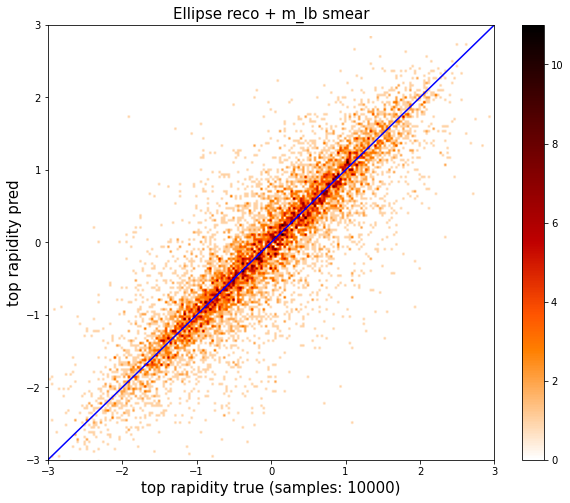

In [61]:
t_rap     = np.array(t_rap)
gen_t_rap = np.array(gen_t_rap)

xlow  = -3
xhigh =  3
#samples    = len(tt_mass)
samples     = 10000
heatmap,xedges,yedges = np.histogram2d(gen_t_rap[:10000], t_rap[:10000],bins=200)
extent  = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.figure(figsize=(10,8))
plt.imshow(heatmap.T ,extent=extent, origin='lower', aspect='auto')
plt.plot([xlow, xhigh], [xlow, xhigh] , color='blue')
plt.set_cmap('gist_heat_r')
plt.xlabel("top rapidity true (samples: %.i)" %samples, fontsize=15)
plt.ylabel("top rapidity pred", fontsize=15)
plt.title("Ellipse reco + m_lb smear", fontsize=15)
plt.xlim(xlow, xhigh)
plt.ylim(xlow, xhigh)
plt.colorbar()

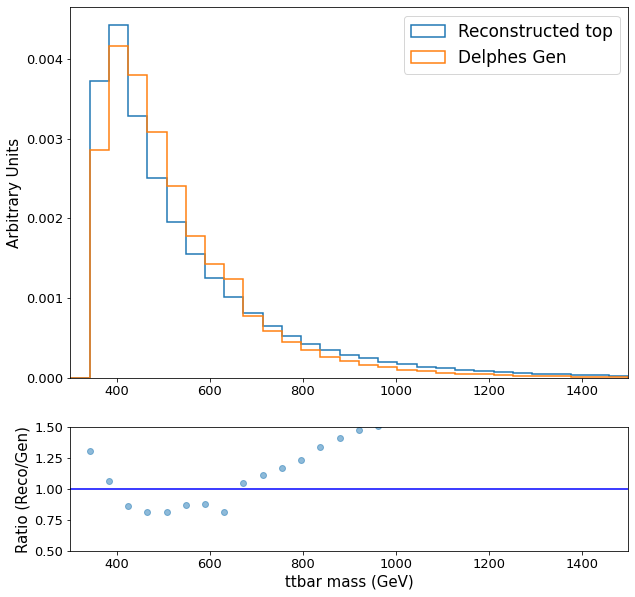

In [62]:
x_low    =  300
x_high   =  1500

binning = np.linspace(x_low,x_high, 30)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(tt_mass    , density=True, histtype='step', bins=binning, label='Reconstructed top', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(gen_tt_mass, density=True, histtype='step', bins=binning, label='Delphes Gen', linewidth=1.5)
ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(x_low,x_high)
ax2.scatter(binning[:-1],  # this is what makes it comparable
            ns1 / ns2,     # maybe check for div-by-zero!
            alpha=0.5)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Reco/Gen)', fontsize=15)
ax2.set_xlabel('ttbar mass (GeV)', fontsize=15)
ax2.set_ylim(0.5, 1.5)
ax2.set_xlim(x_low,x_high)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

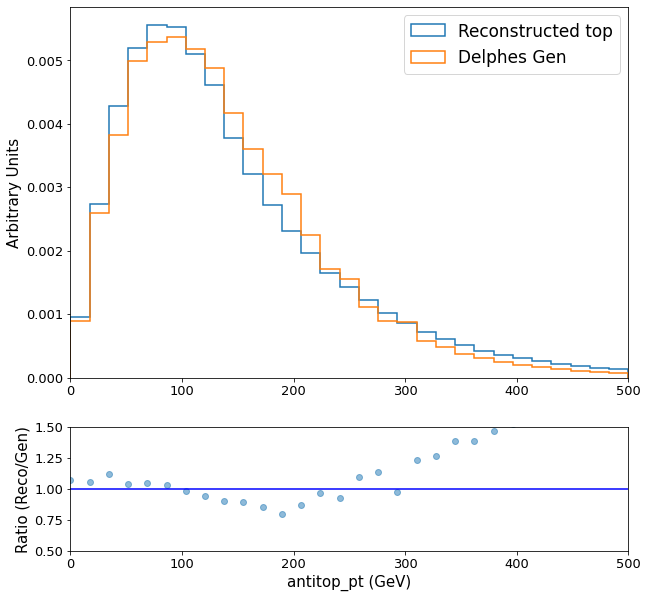

In [63]:
x_low    =  0
x_high   =  500

binning = np.linspace(x_low,x_high, 30)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(tbar_pt   , density=True, histtype='step', bins=binning, label='Reconstructed top', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(gen_tbar_pt, density=True, histtype='step', bins=binning, label='Delphes Gen', linewidth=1.5)
ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(x_low,x_high)
ax2.scatter(binning[:-1],  # this is what makes it comparable
            ns1 / ns2,     # maybe check for div-by-zero!
            alpha=0.5)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Reco/Gen)', fontsize=15)
ax2.set_xlabel('antitop_pt (GeV)', fontsize=15)
ax2.set_ylim(0.5, 1.5)
ax2.set_xlim(x_low,x_high)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

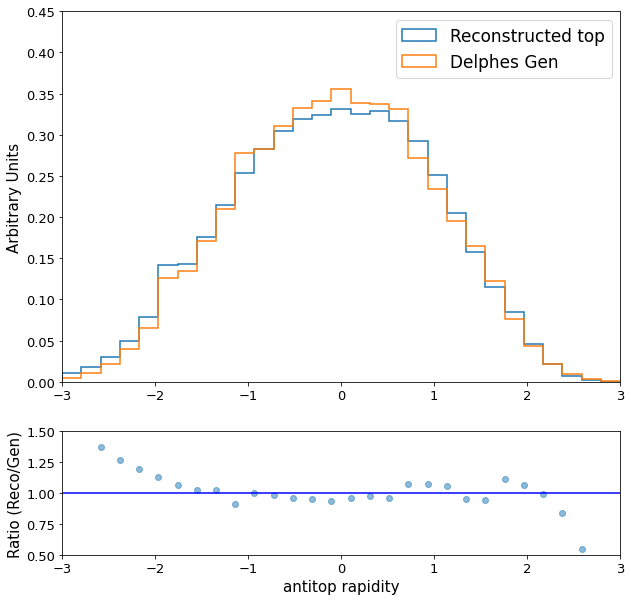

In [64]:
x_low    =  -3
x_high   =   3

binning = np.linspace(x_low,x_high, 30)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(t_rap    , density=True, histtype='step', bins=binning, label='Reconstructed top', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(gen_t_rap, density=True, histtype='step', bins=binning, label='Delphes Gen', linewidth=1.5)
ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(x_low,x_high)
ax1.set_ylim(0,0.45)
ax2.scatter(binning[:-1],  # this is what makes it comparable
            ns1 / ns2,     # maybe check for div-by-zero!
            alpha=0.5)

ax1.set_ylabel('Arbitrary Units' , fontsize=15)
ax2.set_ylabel('Ratio (Reco/Gen)', fontsize=15)
ax2.set_xlabel('antitop rapidity'    , fontsize=15)
ax2.set_ylim(0.5, 1.5)
ax2.set_xlim(x_low,x_high)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [37]:
from scipy.stats import norm
def cuts(datain, datacheck, minval, maxval):
    dataout = datain[np.logical_and(datacheck>minval,datacheck<maxval)]
    return(dataout)

def sem(values):
    sem     = stats.sem(values)
    return(sem)

def plotgaussian(resids,title):
    from matplotlib.pyplot import figure
    figure(figsize=(8, 6))
    resids.sort()
    resmean = np.mean(resids)
    resstd  = np.std(resids)
    pdf     = stats.norm.pdf(resids,resmean,resstd)
    
    plt.hist(resids,bins=50,histtype='step',color='blue',density=1,label='Residuals')
    plt.plot(resids,pdf,label="Normal Curve",color='black')
    plt.title(title)
    plt.xlim(-600,600)
    plt.axvline(resmean, label="Mean: %.2f" % resmean, color='red') 
    
    fwhm    = 2*np.sqrt(2*np.log(2))*resstd
    samples = len(resids)
    
    plt.xlabel("FWHM: %.2f (samples: %.i)" % (fwhm,samples))
    plt.axvspan(resmean-fwhm/2,resmean+fwhm/2,facecolor='g',alpha=.5,label='FWHM')
    plt.legend()
    
def fit_gaussian(x):
    mean, std = norm.fit(x)
    return mean, std

def plot_gaussian(x, mean, std):
    x.sort()
    plt.figure(figsize=(10, 8))
    pdf = stats.norm.pdf(x ,mean, std)

    plt.hist(x, bins=30, histtype='step'     ,color='blue' ,density=1, label='Residuals')
    plt.plot(x, pdf    , label="Normal Curve",color='black')
    plt.xlim(-800,800)
    plt.axvline(mean, label="Mean: %.2f" % mean, color='red') 

    fwhm    = 2*np.sqrt(2*np.log(2))*std
    samples = len(x)

    plt.xlabel("STD: %.2f (samples: %.i)" % (std,samples), fontsize=15)
    plt.ylabel('AU', fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.axvspan(mean - fwhm/2, mean + fwhm/2,facecolor='g',alpha=.5,label='FWHM')
    plt.legend(fontsize=15)

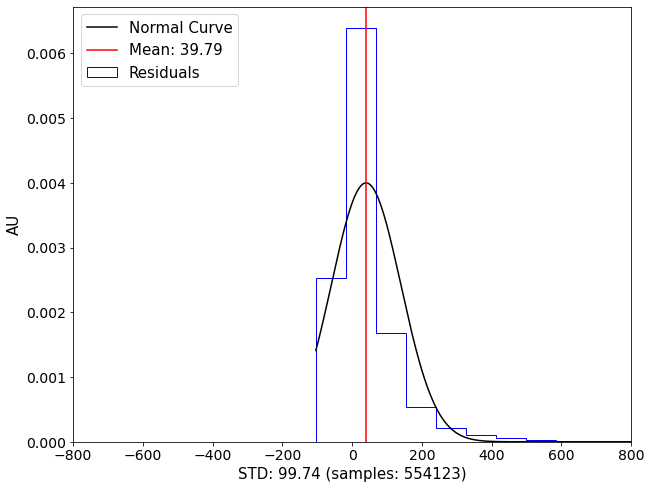

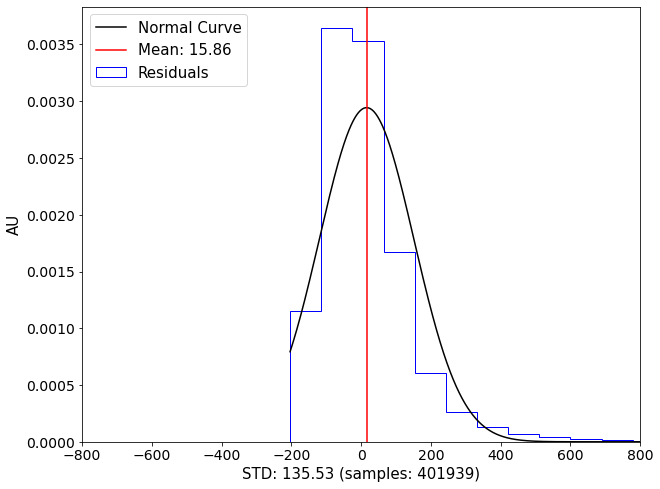

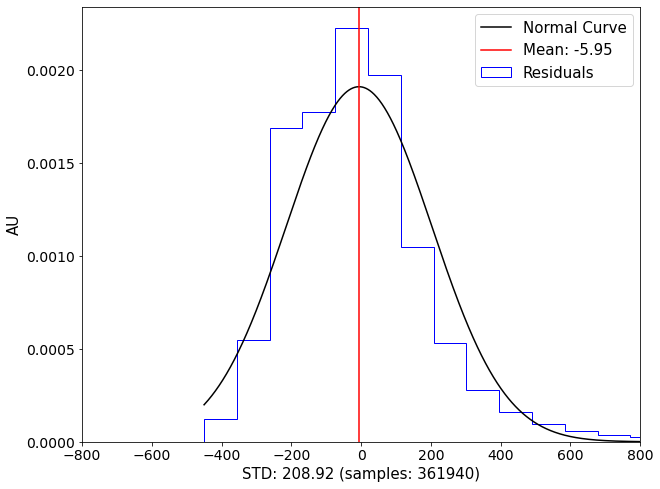

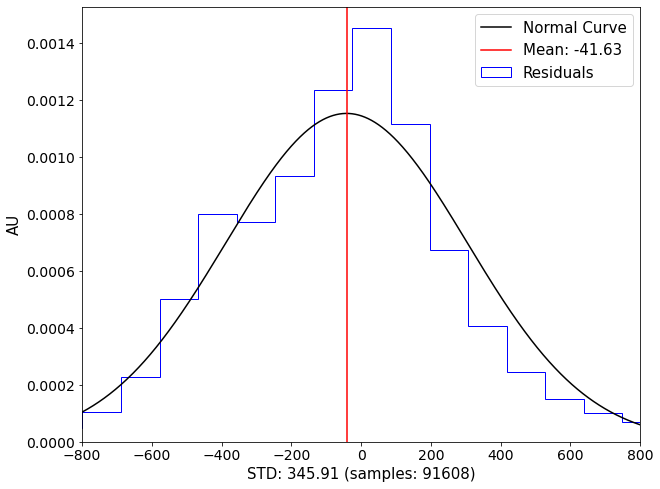

In [39]:
bins  = [0, 450, 550, 800, 1500]
width = []
err_x = []
err_y = []

#mask_reco  = m_ttbar < 1500
#mask_gen   = gen_m_ttbar < 1500
#mask_fin   = mask_reco & mask_gen
samples    = len(tt_mass)

for i in range(len(bins) - 1) :
    residual  = tt_mass -  gen_tt_mass
    temp_res  = cuts(residual, gen_tt_mass, bins[i], bins[i+1])
    temp_mask1 = temp_res < 1500
    temp_mask  = temp_mask1 
    mean, std  = fit_gaussian(temp_res[temp_mask]) 
    plot_gaussian(np.array(temp_res), mean, std)
    width.append(std)
    err_x.append((bins[i+1] - bins[i]) * 0.5)
    err_y.append(1./np.sqrt(len(temp_res)))

In [26]:
def ifOk(var_check) :
    if math.isfinite(var_check) :
        vOk = var_check
    else : 
        vOk = -999999.    
    return vOk

In [72]:
h_b1k = []
h_b2k = []
h_b1j = []
h_b2j = []
h_b1r = []
h_b2r = []
h_b1q = []
h_b2q = []
h_b1n = []
h_b2n = []

h_bPkk = []
h_bMkk = []
h_bPjj = []
h_bMjj = []
h_bPrr = []
h_bMrr = []
h_bPqq = []
h_bMqq = []
h_bPnn = []
h_bMnn = []

h_ckk = []
h_crr = []
h_cnn = []
h_crk = []
h_ckr = []
h_cnr = []
h_crn = []
h_cnk = []
h_ckn = []

h_clab = []
h_dR   = []

# Adapted from https://gitlab.cern.ch/cms-desy-top/TopAnalysis/Configuration/analysis/diLeptonic/src/VariablesPhiTT.cc
for i in range(len(t_pt)) :
    
    top    = ROOT.TLorentzVector()
    atop   = ROOT.TLorentzVector() 
    lep    = ROOT.TLorentzVector()
    alep   = ROOT.TLorentzVector()
      
    #top.SetPtEtaPhiM(t_pt[i]    , t_eta[i]   , t_phi[i]   , 172.5)
    #atop.SetPtEtaPhiM(tbar_pt[i], tbar_eta[i], tbar_phi[i], 172.5)  # Changed from eta to rap
    
    top.SetPxPyPzE(t_px[i]    ,    t_py[i],    t_pz[i],    t_e[i])
    atop.SetPxPyPzE(tbar_px[i], tbar_py[i], tbar_pz[i], tbar_e[i])
    
    lep.SetPtEtaPhiM(    l_pt[i],    l_eta[i],    l_phi[i],    l_mass[i])
    alep.SetPtEtaPhiM(lbar_pt[i], lbar_eta[i], lbar_phi[i], lbar_mass[i]) 
    
    # Lab angle 
    cLab  = alep.Vect().Unit().Dot(lep.Vect().Unit())
    
    # The various Bernreuther bases
    kBase = ROOT.TVector3()
    jBase = ROOT.TVector3()
    qBase = ROOT.TVector3()
    #rBase = ROOT.TVector3()
    #nBase = ROOT.TVector3()
    
    # Beam unit vector
    p3_pPro = ROOT.TVector3(0., 0., 1.)
    
    # The bases definition: Bernreuther spinMatrix 1508.05271
    p4_TT   = top + atop
    b4_TT   = ROOT.TVector3(-1. * p4_TT.BoostVector() )
    
    b4_pTop = top
    b4_pTop.Boost( b4_TT )
    
    b4_aTop = atop
    b4_aTop.Boost( b4_TT )
    
    # Maybe need to be careful with the signs here ?? Check how the pairings are implemented in the FW
    b4_aLep = alep
    b4_aLep.Boost( b4_TT )
    b4_aLep.Boost( -1. * b4_pTop.BoostVector() )
    
    b4_pLep = lep
    b4_pLep.Boost( b4_TT )
    b4_pLep.Boost( -1. * b4_aTop.BoostVector() )
    
    # Calculating the top-beam angle for pTop only
    c_pTP = b4_pTop.Vect().Unit().Dot(p3_pPro)
    s_pTP = np.sqrt(1. - (c_pTP * c_pTP))

    # The signs needed to account for Bose symmetry
    sY = 1. if ( c_pTP >= 0.) else -1.
    sD = 1. if ( abs(top.Rapidity()) >= abs(atop.Rapidity()) ) else -1. 
    
    # Define the base vectors a
    # j and q base are the k* and r* respectively
    # b is always -a
    
    kBase = b4_pTop.Vect().Unit()
    jBase = sD * kBase
    r_arr = (sY / s_pTP) * (p3_pPro - (c_pTP * kBase)) # Store in a temp np array since pyROOT typecasts automatically
    rBase = ROOT.TVector3(r_arr[0], r_arr[1], r_arr[2]).Unit()
    qBase = sD * rBase
    n_arr = (sY / s_pTP) *  p3_pPro.Cross(kBase)       # Store in a temp np array since pyROOT typecasts automatically
    nBase = ROOT.TVector3(n_arr[0], n_arr[1], n_arr[2]).Unit()

    # Find the relevant angles in these bases
    ck_aLep = b4_aLep.Vect().Unit().Dot( kBase )
    ck_pLep = b4_pLep.Vect().Unit().Dot( -1. * kBase )

    cj_aLep = b4_aLep.Vect().Unit().Dot( jBase )
    cj_pLep = b4_pLep.Vect().Unit().Dot( -1. * jBase )

    cr_aLep = b4_aLep.Vect().Unit().Dot( rBase )
    cr_pLep = b4_pLep.Vect().Unit().Dot( -1. * rBase )

    cq_aLep = b4_aLep.Vect().Unit().Dot( qBase )
    cq_pLep = b4_pLep.Vect().Unit().Dot( -1. * qBase )

    cn_aLep = b4_aLep.Vect().Unit().Dot( nBase )
    cn_pLep = b4_pLep.Vect().Unit().Dot( -1. * nBase )
    
    # Fill the raw angles into VarFloats
    b1k = ifOk( ck_aLep )
    b2k = ifOk( ck_pLep )

    b1j = ifOk( cj_aLep )
    b2j = ifOk( cj_pLep )

    b1r = ifOk( cr_aLep )
    b2r = ifOk( cr_pLep )

    b1q = ifOk( cq_aLep )
    b2q = ifOk( cq_pLep )

    b1n = ifOk( cn_aLep )
    b2n = ifOk( cn_pLep )

    # Now we can squeeze it all out based on table 5 page 16
    # The B1 ~ c_aLep, B2 ~ c_pLep sums
    
    bP_kk = ifOk( ck_aLep + ck_pLep )
    bM_kk = ifOk( ck_aLep - ck_pLep )

    bP_jj = ifOk( cj_aLep + cj_pLep )
    bM_jj = ifOk( cj_aLep - cj_pLep )

    bP_rr = ifOk( cr_aLep + cr_pLep )
    bM_rr = ifOk( cr_aLep - cr_pLep )

    bP_qq = ifOk( cq_aLep + cq_pLep )
    bM_qq = ifOk( cq_aLep - cq_pLep )

    bP_nn = ifOk( cn_aLep + cn_pLep )
    bM_nn = ifOk( cn_aLep - cn_pLep )
    
    # spinCorr coeff Cab = -9<cab>
    ckk = ifOk( ck_aLep * ck_pLep )
    crr = ifOk( cr_aLep * cr_pLep )
    cnn = ifOk( cn_aLep * cn_pLep )

    crk = cr_aLep * ck_pLep
    ckr = ck_aLep * cr_pLep

    cnr = cn_aLep * cr_pLep
    crn = cr_aLep * cn_pLep

    cnk = cn_aLep * ck_pLep
    ckn = ck_aLep * cn_pLep
    
    # Find also the opening angles of the lepton
    ll_dEta = ifOk( b4_aLep.Eta() - b4_pLep.Eta() )
    ll_dPhi = ifOk( b4_aLep.DeltaPhi( b4_pLep ) )
    ll_dR   = ifOk( b4_aLep.DeltaR( b4_pLep ) )
    
    if (ll_dR < 0.4 ) : continue
    
    h_ckk.append(ckk)
    h_crr.append(crr)
    h_cnn.append(cnn)
    h_crk.append(crk)
    h_ckr.append(ckr)
    h_cnr.append(cnr)
    h_crn.append(crn)
    h_cnk.append(cnk)
    h_ckn.append(ckn)
    
    h_b1k.append(b1k)
    h_b2k.append(b2k)
    h_b1j.append(b1j)
    h_b2j.append(b2j)
    h_b1r.append(b1r)
    h_b2r.append(b2r)
    h_b1q.append(b1q)
    h_b2q.append(b2q)
    h_b1n.append(b1n)
    h_b2n.append(b2n)
    
    
    h_bPkk.append(bP_kk)
    h_bMkk.append(bP_kk)
    h_bPjj.append(bP_jj)
    h_bMjj.append(bM_jj)
    h_bPrr.append(bP_rr)
    h_bMrr.append(bM_rr)
    h_bPqq.append(bP_qq)
    h_bMqq.append(bM_qq)
    h_bPnn.append(bP_nn)
    h_bMnn.append(bM_nn)
    
    h_clab.append(cLab)
    h_dR.append(ll_dR)

In [73]:
gen_h_b1k = []
gen_h_b2k = []
gen_h_b1j = []
gen_h_b2j = []
gen_h_b1r = []
gen_h_b2r = []
gen_h_b1q = []
gen_h_b2q = []
gen_h_b1n = []
gen_h_b2n = []

gen_h_bPkk = []
gen_h_bMkk = []
gen_h_bPjj = []
gen_h_bMjj = []
gen_h_bPrr = []
gen_h_bMrr = []
gen_h_bPqq = []
gen_h_bMqq = []
gen_h_bPnn = []
gen_h_bMnn = []

gen_h_ckk = []
gen_h_crr = []
gen_h_cnn = []
gen_h_crk = []
gen_h_ckr = []
gen_h_cnr = []
gen_h_crn = []
gen_h_cnk = []
gen_h_ckn = []

gen_h_clab = []

# Adapted from https://gitlab.cern.ch/cms-desy-top/TopAnalysis/Configuration/analysis/diLeptonic/src/VariablesPhiTT.cc
for i in range(len(t_px)) :

        
    top    = ROOT.TLorentzVector()
    atop   = ROOT.TLorentzVector() 
    lep    = ROOT.TLorentzVector()
    alep   = ROOT.TLorentzVector()
      
    top.SetPtEtaPhiM(gen_t_pt[i]    , gen_t_eta[i]   , gen_t_phi[i]   , 172.5)
    atop.SetPtEtaPhiM(gen_tbar_pt[i], gen_tbar_eta[i], gen_tbar_phi[i], 172.5)  # Changed from eta to rap
    
    lep.SetPtEtaPhiM(    l_pt[i],    l_eta[i],    l_phi[i],    l_mass[i])
    alep.SetPtEtaPhiM(lbar_pt[i], lbar_eta[i], lbar_phi[i], lbar_mass[i]) 
    
    # Lab angle 
    cLab  = alep.Vect().Unit().Dot(lep.Vect().Unit())
    
    # The various Bernreuther bases
    kBase = ROOT.TVector3()
    jBase = ROOT.TVector3()
    qBase = ROOT.TVector3()
    #rBase = ROOT.TVector3()
    #nBase = ROOT.TVector3()
    
    # Beam unit vector
    p3_pPro = ROOT.TVector3(0., 0., 1.)
    
    # The bases definition: Bernreuther spinMatrix 1508.05271
    p4_TT   = top + atop
    b4_TT   = ROOT.TVector3(-1. * p4_TT.BoostVector() )
    
    b4_pTop = top
    b4_pTop.Boost( b4_TT )
    
    b4_aTop = atop
    b4_aTop.Boost( b4_TT )
    
    # Maybe need to be careful with the signs here ?? Check how the pairings are implemented in the FW
    b4_aLep = alep
    b4_aLep.Boost( b4_TT )
    b4_aLep.Boost( -1. * b4_pTop.BoostVector() )
    
    b4_pLep = lep
    b4_pLep.Boost( b4_TT )
    b4_pLep.Boost( -1. * b4_aTop.BoostVector() )
    
    # Calculating the top-beam angle for pTop only
    c_pTP = b4_pTop.Vect().Unit().Dot(p3_pPro)
    s_pTP = np.sqrt(1. - (c_pTP * c_pTP))

    # The signs needed to account for Bose symmetry
    sY = 1. if ( c_pTP >= 0.) else -1.
    sD = 1. if ( abs(top.Rapidity()) >= abs(atop.Rapidity()) ) else -1. 
    
    # Define the base vectors a
    # j and q base are the k* and r* respectively
    # b is always -a
    
    kBase = b4_pTop.Vect().Unit()
    jBase = sD * kBase
    r_arr = (sY / s_pTP) * (p3_pPro - (c_pTP * kBase)) # Store in a temp np array since pyROOT typecasts automatically
    rBase = ROOT.TVector3(r_arr[0], r_arr[1], r_arr[2]).Unit()
    qBase = sD * rBase
    n_arr = (sY / s_pTP) *  p3_pPro.Cross(kBase)       # Store in a temp np array since pyROOT typecasts automatically
    nBase = ROOT.TVector3(n_arr[0], n_arr[1], n_arr[2]).Unit()

    # Find the relevant angles in these bases
    ck_aLep = b4_aLep.Vect().Unit().Dot( kBase )
    ck_pLep = b4_pLep.Vect().Unit().Dot( -1. * kBase )

    cj_aLep = b4_aLep.Vect().Unit().Dot( jBase )
    cj_pLep = b4_pLep.Vect().Unit().Dot( -1. * jBase )

    cr_aLep = b4_aLep.Vect().Unit().Dot( rBase )
    cr_pLep = b4_pLep.Vect().Unit().Dot( -1. * rBase )

    cq_aLep = b4_aLep.Vect().Unit().Dot( qBase )
    cq_pLep = b4_pLep.Vect().Unit().Dot( -1. * qBase )

    cn_aLep = b4_aLep.Vect().Unit().Dot( nBase )
    cn_pLep = b4_pLep.Vect().Unit().Dot( -1. * nBase )
    
    # Fill the raw angles into VarFloats
    b1k = ifOk( ck_aLep )
    b2k = ifOk( ck_pLep )

    b1j = ifOk( cj_aLep )
    b2j = ifOk( cj_pLep )

    b1r = ifOk( cr_aLep )
    b2r = ifOk( cr_pLep )

    b1q = ifOk( cq_aLep )
    b2q = ifOk( cq_pLep )

    b1n = ifOk( cn_aLep )
    b2n = ifOk( cn_pLep )

    # Now we can squeeze it all out based on table 5 page 16
    # The B1 ~ c_aLep, B2 ~ c_pLep sums
    
    bP_kk = ifOk( ck_aLep + ck_pLep )
    bM_kk = ifOk( ck_aLep - ck_pLep )

    bP_jj = ifOk( cj_aLep + cj_pLep )
    bM_jj = ifOk( cj_aLep - cj_pLep )

    bP_rr = ifOk( cr_aLep + cr_pLep )
    bM_rr = ifOk( cr_aLep - cr_pLep )

    bP_qq = ifOk( cq_aLep + cq_pLep )
    bM_qq = ifOk( cq_aLep - cq_pLep )

    bP_nn = ifOk( cn_aLep + cn_pLep )
    bM_nn = ifOk( cn_aLep - cn_pLep )
    
    # spinCorr coeff Cab = -9<cab>
    ckk = ifOk( ck_aLep * ck_pLep )
    crr = ifOk( cr_aLep * cr_pLep )
    cnn = ifOk( cn_aLep * cn_pLep )

    crk = cr_aLep * ck_pLep
    ckr = ck_aLep * cr_pLep

    cnr = cn_aLep * cr_pLep
    crn = cr_aLep * cn_pLep

    cnk = cn_aLep * ck_pLep
    ckn = ck_aLep * cn_pLep
    
    gen_h_ckk.append(ckk)
    gen_h_crr.append(crr)
    gen_h_cnn.append(cnn)
    gen_h_crk.append(crk)
    gen_h_ckr.append(ckr)
    gen_h_cnr.append(cnr)
    gen_h_crn.append(crn)
    gen_h_cnk.append(cnk)
    gen_h_ckn.append(ckn)
    
    gen_h_b1k.append(b1k)
    gen_h_b2k.append(b2k)
    gen_h_b1j.append(b1j)
    gen_h_b2j.append(b2j)
    gen_h_b1r.append(b1r)
    gen_h_b2r.append(b2r)
    gen_h_b1q.append(b1q)
    gen_h_b2q.append(b2q)
    gen_h_b1n.append(b1n)
    gen_h_b2n.append(b2n)
    
    
    gen_h_bPkk.append(bP_kk)
    gen_h_bMkk.append(bP_kk)
    gen_h_bPjj.append(bP_jj)
    gen_h_bMjj.append(bM_jj)
    gen_h_bPrr.append(bP_rr)
    gen_h_bMrr.append(bM_rr)
    gen_h_bPqq.append(bP_qq)
    gen_h_bMqq.append(bM_qq)
    gen_h_bPnn.append(bP_nn)
    gen_h_bMnn.append(bM_nn)
    
    gen_h_clab.append(cLab)

IndexError: list index out of range

In [52]:
tt_ptr   = uproot.open('/media/amandeephy/Seagate Portable Media/CMS_data/emu_ttbarsignalplustau.root')['ttBar_treeVariables_step8']
tt_ckk   = tt_ptr['c_kk'].array()
tt_cnn   = tt_ptr['c_nn'].array()
tt_crr   = tt_ptr['c_rr'].array()
tt_crk   = tt_ptr['c_rk'].array()
tt_ckr   = tt_ptr['c_kr'].array()
tt_cnr   = tt_ptr['c_nr'].array()
tt_crn   = tt_ptr['c_rn'].array()
tt_cnk   = tt_ptr['c_nk'].array()
tt_ckn   = tt_ptr['c_kn'].array()

tt_b1k   = tt_ptr['b1k'].array()
tt_b2k   = tt_ptr['b2k'].array()
tt_b1q   = tt_ptr['b1q'].array()
tt_b2q   = tt_ptr['b2q'].array()
tt_b1r   = tt_ptr['b1r'].array()
tt_b2r   = tt_ptr['b2r'].array()
tt_b1n   = tt_ptr['b1n'].array()
tt_b2n   = tt_ptr['b2n'].array()
tt_b1j   = tt_ptr['b1j'].array()
tt_b2j   = tt_ptr['b2j'].array()

tt_b_Pkk   = tt_ptr['b_Pkk'].array()
tt_b_Mkk   = tt_ptr['b_Mkk'].array()
tt_b_Pqq   = tt_ptr['b_Pqq'].array()
tt_b_Mqq   = tt_ptr['b_Mqq'].array()
tt_b_Prr   = tt_ptr['b_Prr'].array()
tt_b_Mrr   = tt_ptr['b_Mrr'].array()
tt_b_Pnn   = tt_ptr['b_Pnn'].array()
tt_b_Mnn   = tt_ptr['b_Mnn'].array()
tt_b_Pjj   = tt_ptr['b_Pjj'].array()
tt_b_Mjj   = tt_ptr['b_Mjj'].array()

tt_clab      = tt_ptr['ll_cLab'].array()

In [53]:
gen_tt_b1k   = tt_ptr['gen_b1k'].array()
gen_tt_b2k   = tt_ptr['gen_b2k'].array()
gen_tt_b1q   = tt_ptr['gen_b1q'].array()
gen_tt_b2q   = tt_ptr['gen_b2q'].array()
gen_tt_b1r   = tt_ptr['gen_b1r'].array()
gen_tt_b2r   = tt_ptr['gen_b2r'].array()
gen_tt_b1n   = tt_ptr['gen_b1n'].array()
gen_tt_b2n   = tt_ptr['gen_b2n'].array()
gen_tt_b1j   = tt_ptr['gen_b1j'].array()
gen_tt_b2j   = tt_ptr['gen_b2j'].array()
tt_cnn       = tt_ptr['gen_c_nn'].array()

gen_tt_b_Pkk   = tt_ptr['gen_b_Pkk'].array()
gen_tt_b_Mkk   = tt_ptr['gen_b_Mkk'].array()
gen_tt_b_Pqq   = tt_ptr['gen_b_Pqq'].array()
gen_tt_b_Mqq   = tt_ptr['gen_b_Mqq'].array()
gen_tt_b_Prr   = tt_ptr['gen_b_Prr'].array()
gen_tt_b_Mrr   = tt_ptr['gen_b_Mrr'].array()
gen_tt_b_Pnn   = tt_ptr['gen_b_Pnn'].array()
gen_tt_b_Mnn   = tt_ptr['gen_b_Mnn'].array()
gen_tt_b_Pjj   = tt_ptr['gen_b_Pjj'].array()
gen_tt_b_Mjj   = tt_ptr['gen_b_Mjj'].array()

In [53]:
tt_gen_t_pt   = tt_ptr['gen_top_pt'].array()
tt_gen_t_phi  = tt_ptr['gen_top_phi'].array()
tt_gen_t_eta  = tt_ptr['gen_top_rapidity'].array()

tt_gen_tbar_pt   = tt_ptr['gen_tbar_pt'].array()
tt_gen_tbar_phi  = tt_ptr['gen_tbar_phi'].array()
tt_gen_tbar_eta  = tt_ptr['gen_tbar_rapidity'].array()

In [69]:
tt_gen_s = []
for i in range(len(tt_gen_t_pt)) :
    # tt_gen level tops for Ecom
    top     = ROOT.TLorentzVector()
    top.SetPtEtaPhiM(tt_gen_t_pt[i], tt_gen_t_eta[i], tt_gen_t_phi[i], 172.5)

    antitop = ROOT.TLorentzVector()
    antitop.SetPtEtaPhiM(tt_gen_tbar_pt[i], tt_gen_tbar_eta[i], tt_gen_tbar_phi[i], 172.5)
    
    # COM energy
    com = top + antitop 
    s   = np.sqrt(com * com)
    tt_gen_s.append(s)

In [70]:
def Delphes_custom1(x, *args) :
    loc1, hl1, loc2, hl2, loc3, hl3, loc4, hl4 = args # mean, std dev, gaussian and expo amplitudes and half life
    ret    = 0
    break1 = 450
    break2 = 1000
    break3 = 1700
    if  (x < break1): 
        return scipy.stats.moyal.pdf(x, loc = loc1 , scale = hl1)
    elif(x > break1 and x < break2):
        return scipy.stats.expon.pdf(x, loc = loc2 , scale = hl2)
    elif(x > break2 and x < break3):
        return scipy.stats.expon.pdf(x, loc = loc3 , scale = hl3)
    elif(x > break3) :
        return scipy.stats.expon.pdf(x, loc = loc4 , scale = hl4)
    
# Break points hard coded here N.B.
def Run2_custom1(x, *args) :
    loc1, hl1, loc2, hl2, loc3, hl3, loc4, hl4 = args # mean, std dev, gaussian and expo amplitudes and half life
    ret    = 0
    break1 = 450
    break2 = 900
    break3 = 1500
    
    if  (x < break1): 
        return scipy.stats.moyal.pdf(x, loc = loc1 , scale = hl1)
    elif(x > break1 and x < break2):
        return scipy.stats.expon.pdf(x, loc = loc2 , scale = hl2)
    elif(x > break2 and x < break3):
        return scipy.stats.expon.pdf(x, loc = loc3 , scale = hl3)
    elif(x > break3) :
        return scipy.stats.expon.pdf(x, loc = loc4 , scale = hl4)

In [71]:
fitted_params     = [429.29340381,  56.43383024, 371.20706998, 163.58696611, 264.6865931 , 204.67607104,  36.37318731, 253.13927045]
run2_fitted_params= [420.26914493,  50.50009481, 363.47562135, 149.34154791, 270.03314422, 193.31105626, -21.99569451, 260.23734524]

In [76]:
rev_w = []
for i in range(len(tt_gen_s)):
    run2_w    = Run2_custom1(tt_gen_s[i]   , *run2_fitted_params)
    delph_w   = Delphes_custom1(tt_gen_s[i], *fitted_params)
    rev_w.append(delph_w / run2_w)

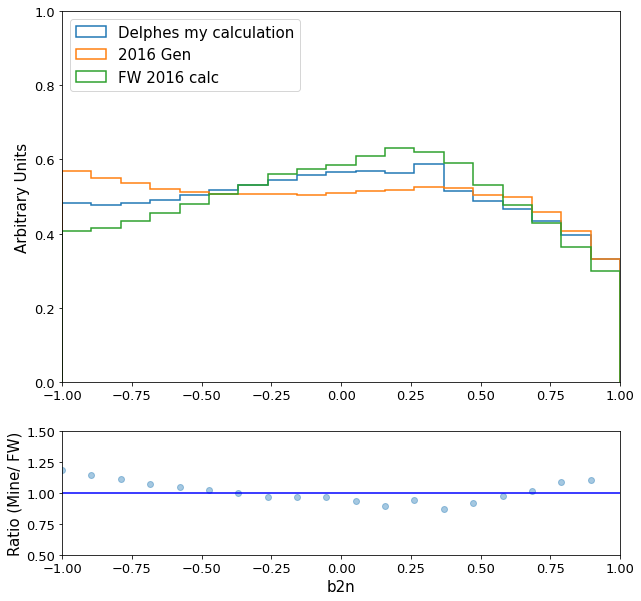

In [77]:
x_low   =  -1
x_high  =   1
binning = np.linspace(x_low,x_high, 20)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(h_b2r      , density=True, histtype='step', bins=binning, label='Delphes my calculation', linewidth=1.5)
#ns1, bins1, patches  = ax1.hist(gen_h_b1k  , density=True, histtype='step', bins=binning, label='Delphes gen', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(gen_tt_b2r , density=True, histtype='step', bins=binning, label='2016 Gen', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(tt_b2r     , density=True, histtype='step', bins=binning, label='FW 2016 calc', linewidth=1.5)
#ns2, bins2, patches  = ax1.hist(tt_b1n    , density=True, histtype='step', bins=binning, label='FW 2016 calc reweighed', linewidth=1.5, weights=rev_w)

ax1.legend(prop={'size': 15}, loc='upper left')
ax1.set_xlim(x_low,x_high)
ax1.set_ylim(0, 1)
ax2.scatter(binning[:-1],     # this is what makes it comparable
        ns1 / ns2,            # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Mine/ FW)', fontsize=15)
ax2.set_xlabel('b2n', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(x_low,x_high)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [105]:
dataFile      = ROOT.TFile("Top_reco/KinReco_input.root","OPEN")

h_jetAngleRes = dataFile.Get("KinReco_d_angle_jet_step7")
h_lepAngleRes = dataFile.Get("KinReco_d_angle_lep_step7")
h_jetEres     = dataFile.Get("KinReco_fE_jet_step7")
h_lepEres     = dataFile.Get("KinReco_fE_lep_step7")
h_mbl_w       = dataFile.Get("KinReco_mbl_true_step0")
h_wmass       = dataFile.Get("KinReco_W_mass_step0")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


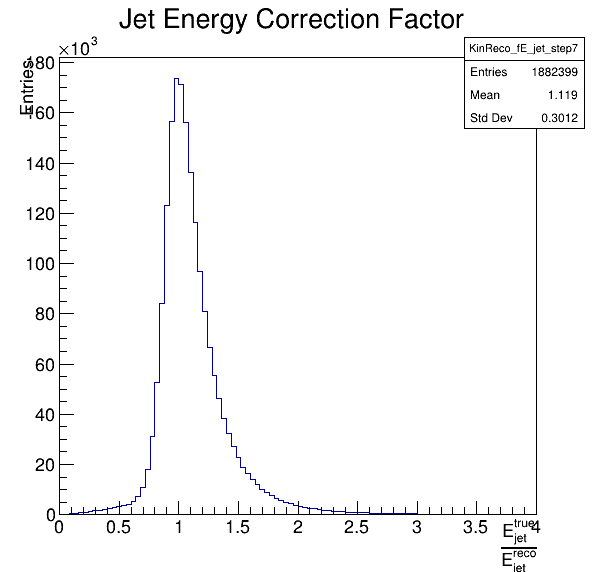

In [124]:
c1 = ROOT.TCanvas('c1', 'c1', 600, 600)
h_jetEres.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


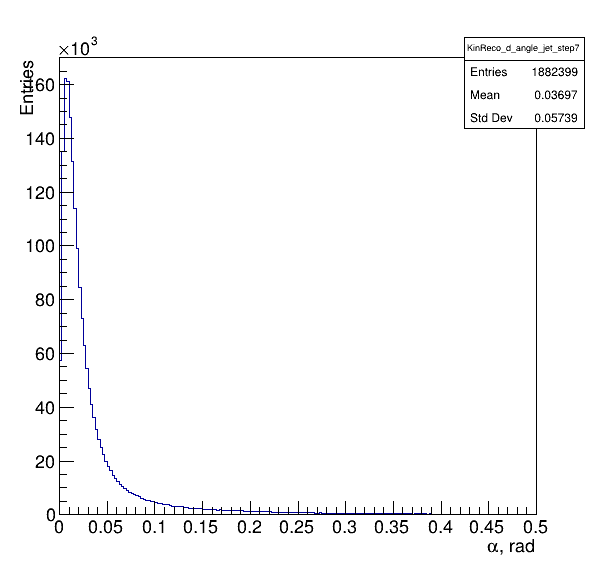

In [127]:
c1 = ROOT.TCanvas('c1', 'c1', 600, 600)
h_jetAngleRes.Draw()
c1.Draw()